#**Kalman Filter For Moving Object**

In [3]:
! pip install pykalman

     |████████████████████████████████| 235kB 3.9MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-cp37-none-any.whl size=48464 sha256=b1e9817fc44d57cb37d363ea17b13ccbe60b0bac7988fb8be33e8cca04c632e4
  Stored in directory: /root/.cache/pip/wheels/d9/e8/6a/553d9832679cb74a8434fa597c3abdb07313e40054a0adf9ac
Successfully built pykalman


In [4]:
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

**Let’s assume an object moves up and down over time, and the censor detects it with a small error. I postulate a perfect sin wave with randomness for the movement over time. When the location is plotted over time, it looks like the following**

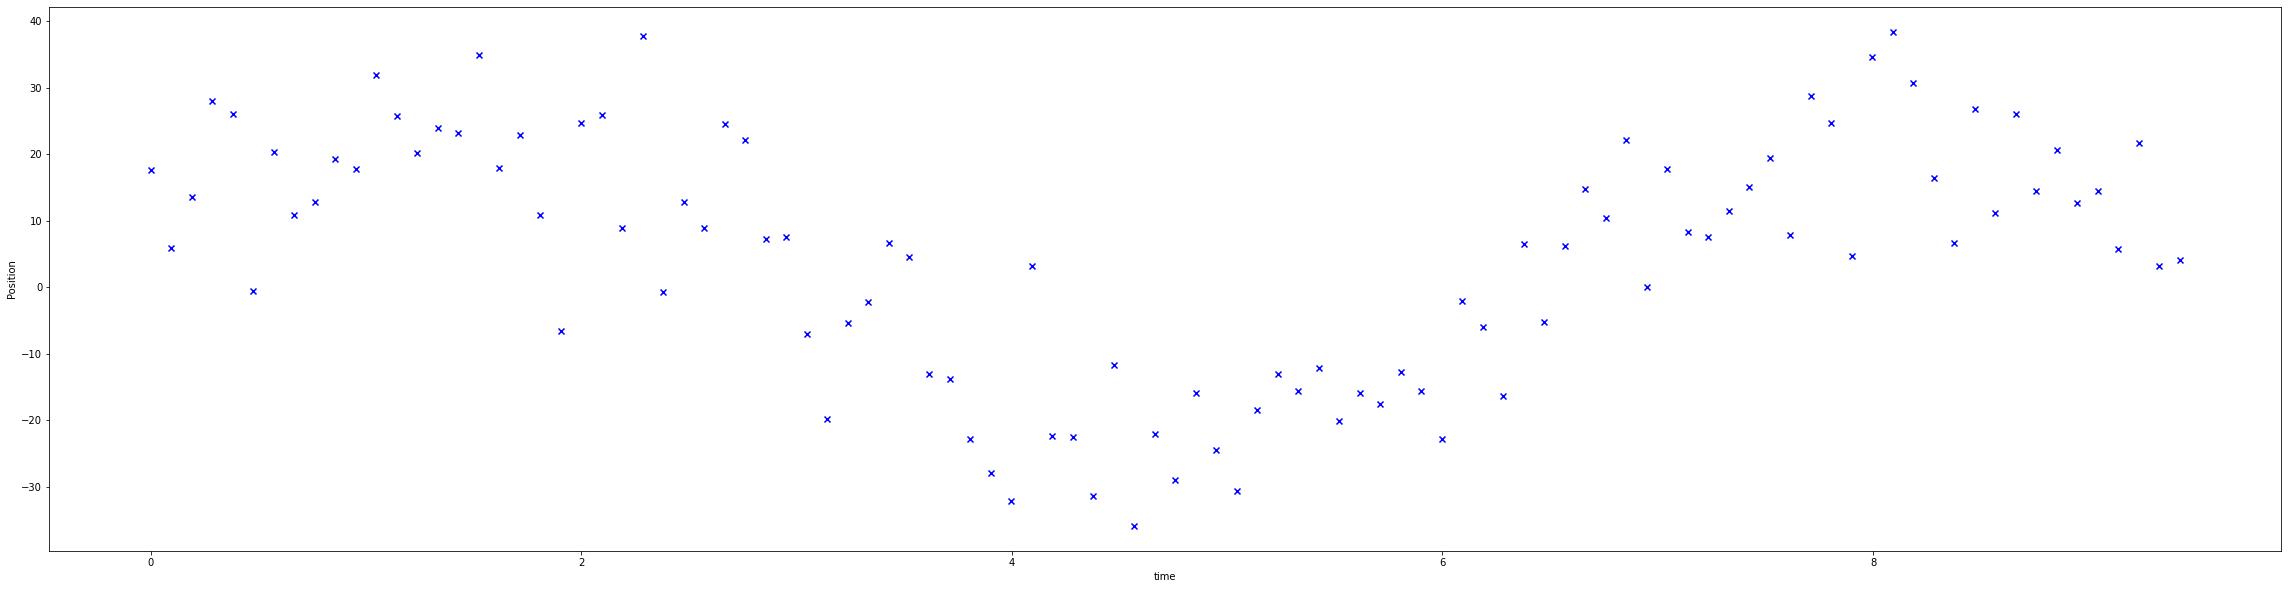

In [8]:
rnd = np.random.RandomState(0)
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
y = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))
pl.figure(figsize=(40, 10))
pl.scatter(x,y, marker='x', color='b', label='observations')
pl.xlabel('time')
pl.ylabel('Position')
pl.show()

**Construction of Kalman Filter with transition_covariance**

In [9]:
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))
states_pred = kf.em(y).smooth(y)[0]

**Here,the state vector Xt can have two elements: position and velocity, and both are unobservable and hence the transition matrix would also consist of the same ,when passing the same through the kalman filter the output would be a perfect sine curve**

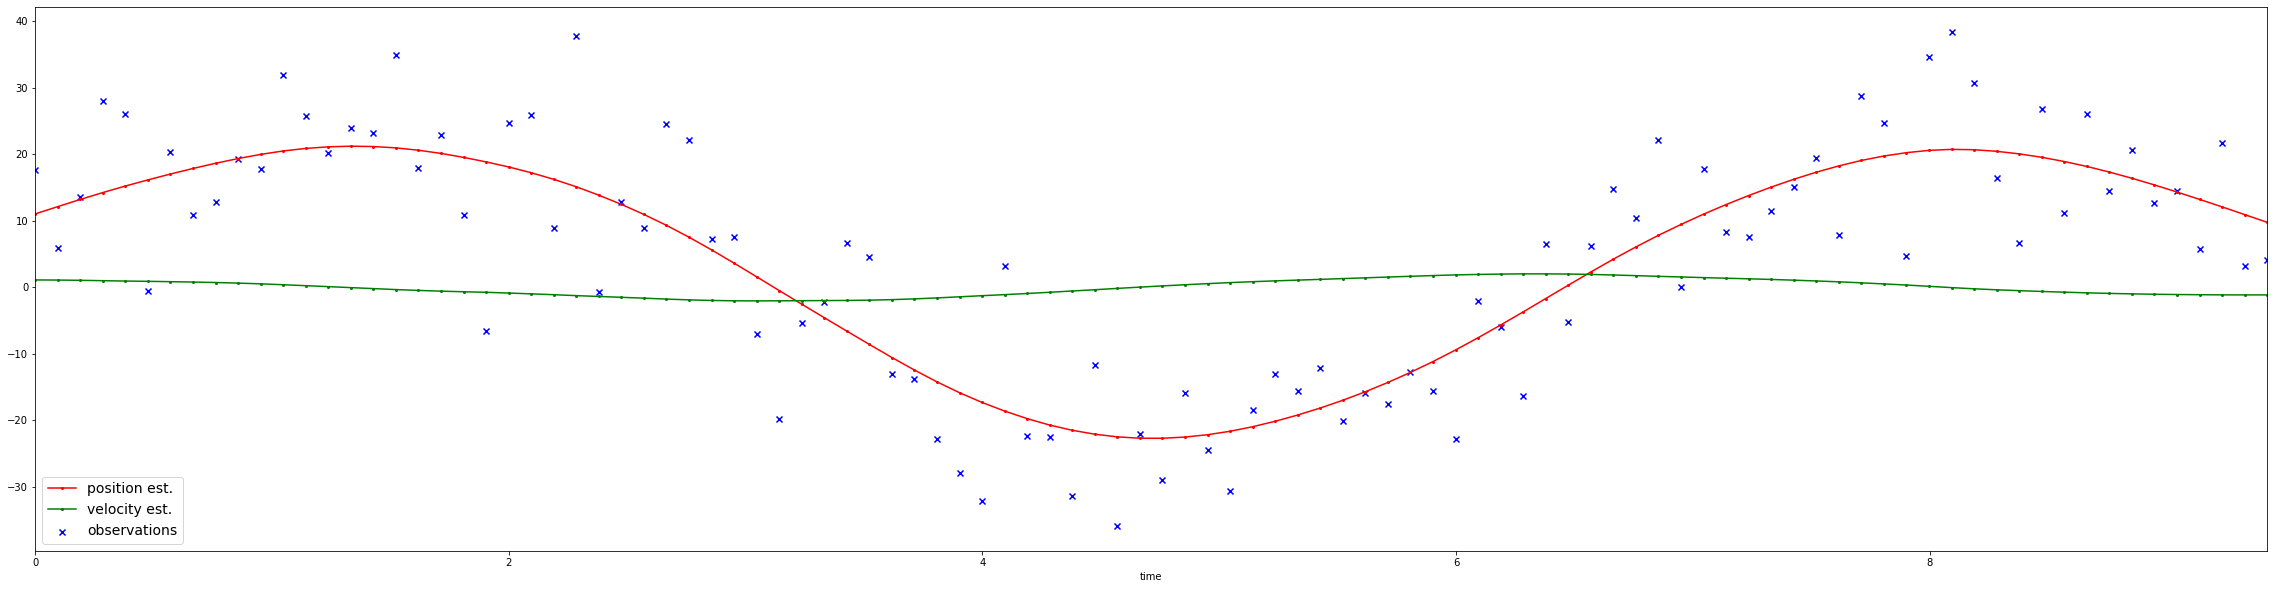

In [10]:
pl.figure(figsize=(40, 10))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],markersize=2,
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, states_pred[:, 1],markersize=2,
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower left',fontsize=14)
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()

**If in case there is only a single element in the  transition matrix , then this would be the result for the same , it would not be a perfect sinecurve but would resemble the same**

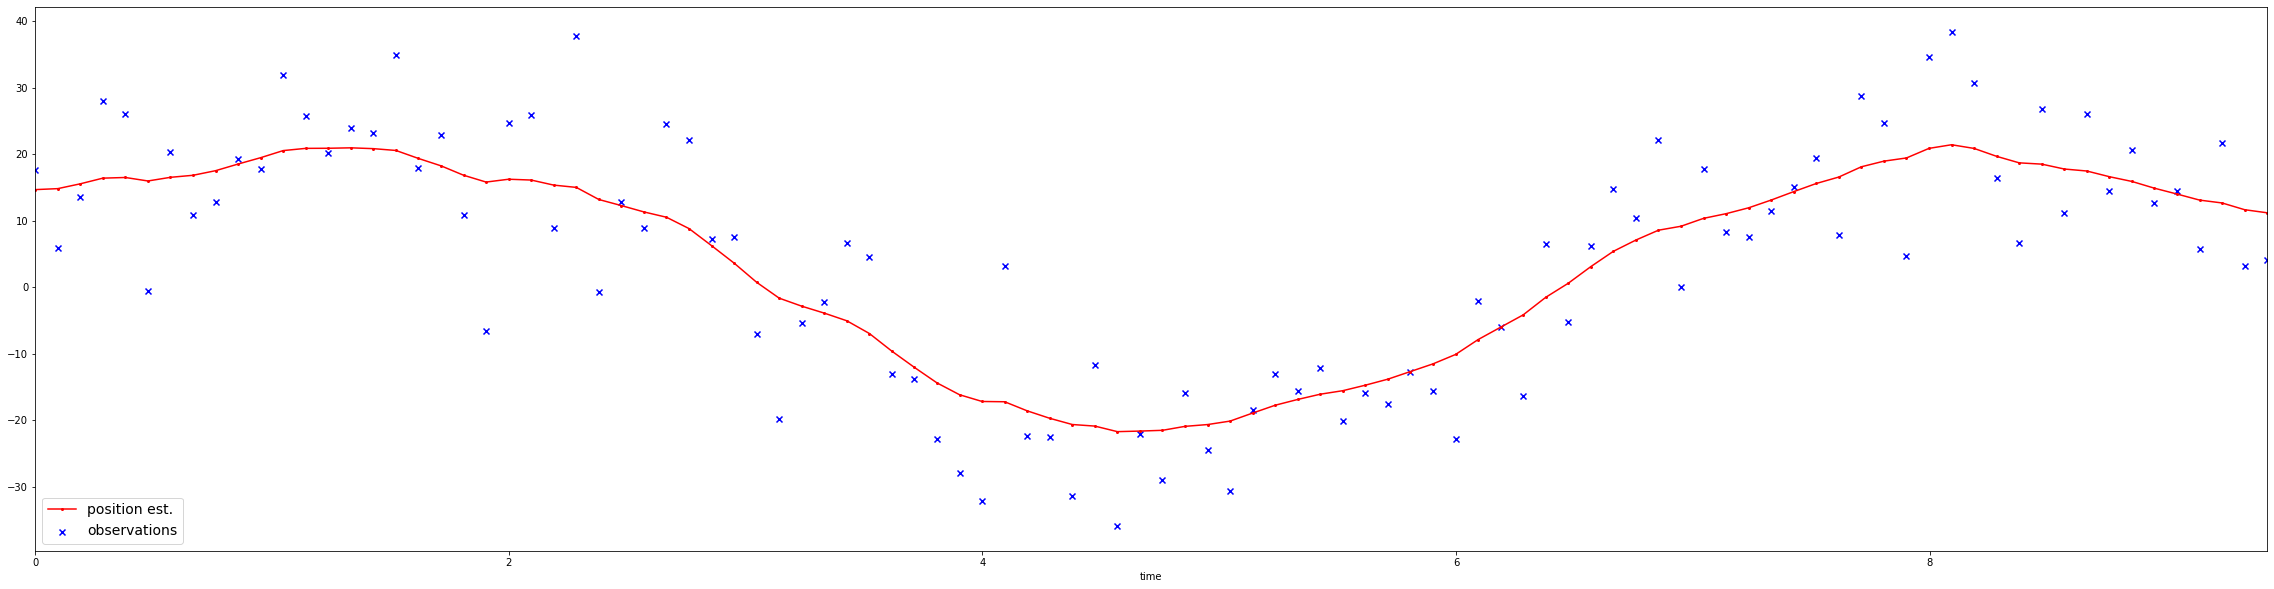

In [12]:
kf = KalmanFilter(transition_matrices=[1],
                  transition_covariance=0.01)
states_pred = kf.em(y).smooth(y)[0]
pl.figure(figsize=(40, 10))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred,markersize=2,
                        linestyle='-', marker='o', color='r',
                        label='position est.')
pl.legend(loc='lower left',fontsize=14)
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()